Importing the Dependencies

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
#!pip uninstall scikit-learn-y
#!pip install pycaret -U pycaret scikit -learn


importing the house price dataset from kaggle

In [7]:
house_price_dataset = pd.read_csv("/content/House-Price-Prediction-clean.csv")

In [8]:
print(house_price_dataset)

        Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
0        1          60     8450            7            5       2003   
1        2          20     9600            6            8       1976   
2        3          60    11250            7            5       2001   
3        4          70     9550            7            5       1915   
4        5          60    14260            8            5       2000   
...    ...         ...      ...          ...          ...        ...   
1455  1456          60     7917            6            5       1999   
1456  1457          20    13175            6            6       1978   
1457  1458          70     9042            7            9       1941   
1458  1459          20     9717            5            6       1950   
1459  1460          20     9937            5            6       1965   

      YearRemodAdd  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  ...  WoodDeckSF  \
0             2003         706        150          856  ... 

In [9]:
#print first 5 rows
house_price_dataset.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [10]:
#add the target (price) column to the Dataframe
house_price_dataset['price']=house_price_dataset.SalePrice

In [11]:
house_price_dataset.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,price
0,1,60,8450,7,5,2003,2003,706,150,856,...,61,0,0,0,0,0,2,2008,208500,208500
1,2,20,9600,6,8,1976,1976,978,284,1262,...,0,0,0,0,0,0,5,2007,181500,181500
2,3,60,11250,7,5,2001,2002,486,434,920,...,42,0,0,0,0,0,9,2008,223500,223500
3,4,70,9550,7,5,1915,1970,216,540,756,...,35,272,0,0,0,0,2,2006,140000,140000
4,5,60,14260,8,5,2000,2000,655,490,1145,...,84,0,0,0,0,0,12,2008,250000,250000


In [12]:
#printing the no. of rows and columns
house_price_dataset.shape

(1460, 33)

In [13]:
#checking the missing values
house_price_dataset.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
price            0
dtype: int64

In [14]:
# statistical measures of the dataset
house_price_dataset.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,price
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,567.240411,1057.429452,...,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,441.866955,438.705324,...,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,477.500000,991.500000,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,808.000000,1298.250000,...,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,2336.000000,6110.000000,...,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,755000.000000


understanding the correlation between various features in the dataset

1. Positive correlation
2. Negative correlation

In [15]:
correlation = house_price_dataset.corr()

<Axes: >

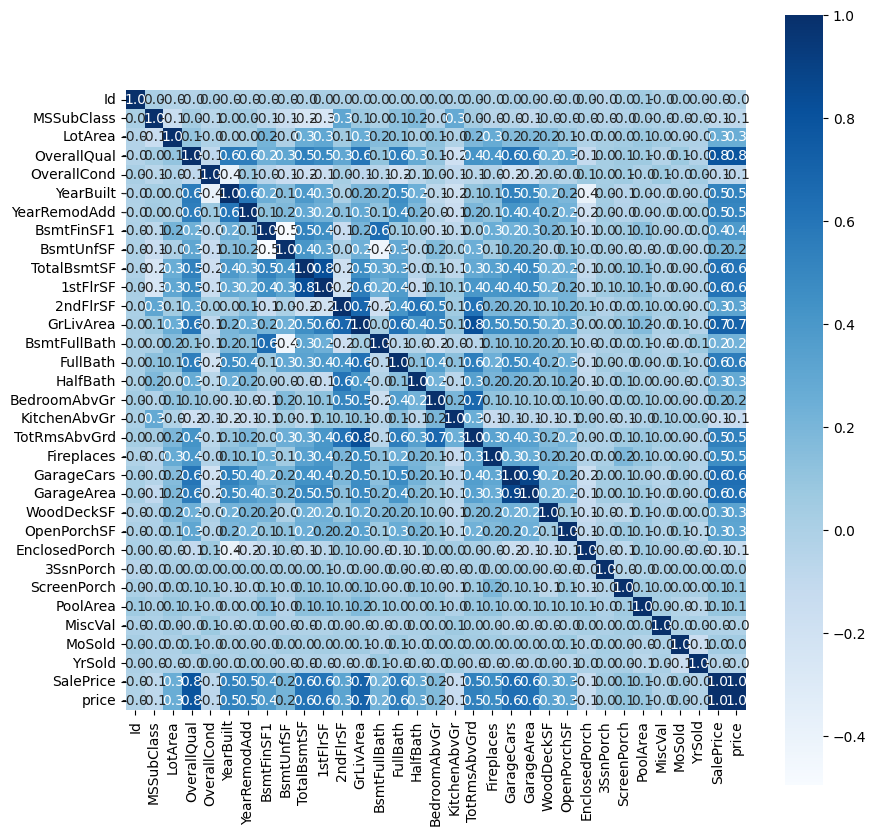

In [16]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar = True,square = True ,fmt= '.1f',annot = True,annot_kws={'size':10},cmap= 'Blues')

splitting the data and target

In [17]:
#x = house_price_dataset.drop([0],axis = 0)
#y = house_price_dataset['price']

In [18]:
#print(x)
#print(y)

In [19]:
x = house_price_dataset.drop(['price'],axis = 1)
y = house_price_dataset['price']

In [20]:
print(x)
print(y)

        Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
0        1          60     8450            7            5       2003   
1        2          20     9600            6            8       1976   
2        3          60    11250            7            5       2001   
3        4          70     9550            7            5       1915   
4        5          60    14260            8            5       2000   
...    ...         ...      ...          ...          ...        ...   
1455  1456          60     7917            6            5       1999   
1456  1457          20    13175            6            6       1978   
1457  1458          70     9042            7            9       1941   
1458  1459          20     9717            5            6       1950   
1459  1460          20     9937            5            6       1965   

      YearRemodAdd  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  ...  WoodDeckSF  \
0             2003         706        150          856  ... 

Splitting the data into training set and test set

In [21]:
x_train ,x_test,y_train, y_test= train_test_split(x,y,test_size = 0.2,random_state=2)

In [22]:
print(x.shape,x_train.shape,x_test.shape)

(1460, 32) (1168, 32) (292, 32)


Model Training

XGBoost Regression

In [23]:
# loading the model
model = XGBRegressor()

In [24]:
# training the model with x_train
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaulation

prediction on training  data

In [25]:
#accuracy for prediction on training model data
training_data_prediction=model.predict(x_train)

In [26]:
print(training_data_prediction)

[175284.83  132385.73  147070.81  ... 154939.86  446227.12  125040.945]


In [27]:
#r squared error
score_1=metrics.r2_score(y_train,training_data_prediction)
#mean absolute error
score_2=metrics.mean_absolute_error(y_train,training_data_prediction)

print("R square error:",score_1)
print("mean absolute error:",score_2)

R square error: 0.9999988308919858
mean absolute error: 61.828924309717465


Prediction on test data

visualizing the actual prices and predicted price

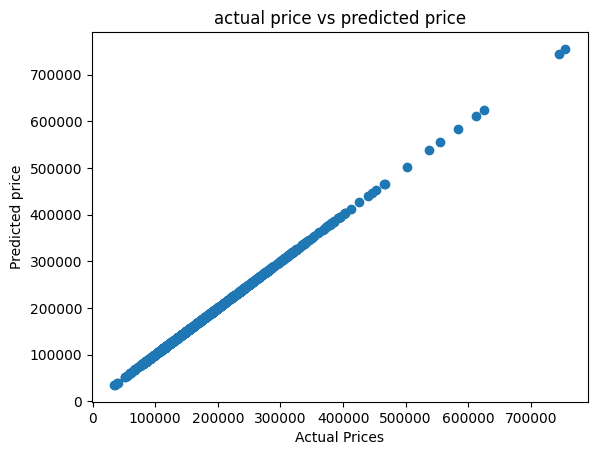

In [28]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted price")
plt.title("actual price vs predicted price")
plt.show()

In [29]:
#accuracy for prediction on test model data
test_data_prediction=model.predict(x_test)

In [30]:
#r squared error
score_1=metrics.r2_score(y_test,test_data_prediction)
#mean absolute error
score_2=metrics.mean_absolute_error(y_test,test_data_prediction)

print("R square error:",score_1)
print("mean absolute error:",score_2)



R square error: 0.9974594884871665
mean absolute error: 1398.0644129922946


In [38]:
pip install pycaret

In [ ]:
from pycaret.regression import *
model_setup=setup(data=house_price_dataset,target='SalePrice',silent=True)
cm=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,2.810000e-02,1.700000e-03,3.850000e-02,1.000000e+00,0.0000,0.000000e+00,0.224
omp,Orthogonal Matching Pursuit,8.400000e-02,1.136000e-01,2.367000e-01,1.000000e+00,0.0000,0.000000e+00,0.012
lasso,Lasso Regression,1.831000e-01,4.576000e-01,5.898000e-01,1.000000e+00,0.0000,0.000000e+00,0.024
par,Passive Aggressive Regressor,1.582800e+00,6.098900e+00,2.347900e+00,1.000000e+00,0.0000,0.000000e+00,0.041
br,Bayesian Ridge,5.966900e+00,4.222482e+03,4.553780e+01,1.000000e+00,0.0006,1.000000e-04,0.080
huber,Huber Regressor,5.370000e-02,5.200000e-03,7.000000e-02,1.000000e+00,0.0000,0.000000e+00,0.081
llar,Lasso Least Angle Regression,2.175570e+01,9.305916e+02,3.014910e+01,1.000000e+00,0.0002,1.000000e-04,0.012
en,Elastic Net,1.869000e-01,4.330000e-01,5.965000e-01,1.000000e+00,0.0000,0.000000e+00,0.021
ridge,Ridge Regression,1.124000e-01,4.530000e-02,1.990000e-01,1.000000e+00,0.0000,0.000000e+00,0.011
gbr,Gradient Boosting Regressor,8.345557e+02,1.099364e+07,2.621533e+03,9.985000e-01,0.0124,4.700000e-03,0.539


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
INFO:logs:compare_models() succesfully completed......................................


### THANK YOU
